# Random Walks

This section will discuss a new topic: *random walks*. Random walks are an example of a Markov process, which will also be defined shortly. Finally, we discuss how to analyze the behavior of the random walker using a Markov chain.

It should be mentioned that the exercises for this section are slightly more extensive and project-based than others.


## Random Walks

A random walk is a process in which we follow some object taking *random steps*. The path the object walks then defines a random path or trajectory. Random walks are powerful mathematical objects with a large number of use cases. Some examples of random walks are presented below.


### The 1D Random Walker

A random walk can refer to many different processes, but the simplest case is a 1D random walk on a regular grid. Assume some walker starts off at $x=0$ and subsequently takes steps to the left or right at random, with equal probability.

```{figure} ../../figures/1D_walk.png
---
width: 600px
name: 1D_walk
alt: 1D_walk
---
```


We denote the position of the walker after $N$ steps by $X_N$. Because the walker is taking random steps, $X_N$ is called a *random* or *stochastic variable*. It will not have a specific value in general but be different for each specific random walk, depending on what steps are actually taken.

For each step the walker takes, it moves either 1 step to the left or 1 step to the right. Thus

$$X_{N+1} = X_{N} + K_N,$$

where $K_N$ is the $N$'th step taken. We assume that all steps are independent of all others, and that each step has an equal chance of being to the left or to the right, so

$$K_N = \begin{cases}
1 & \mbox{with 50} \% \mbox{ chance} \\
-1 & \mbox{with 50}\% \mbox{ chance}
\end{cases}$$

It is possible to investigate how a random walk looks. First, we draw the step $K_N$ using NumPy through `2 * np.random.randint(2) - 1`, which will return -1 or 1 with equal probability. Notice that `np.random.randint(2)` returns 0 or 1, also with equal probability.

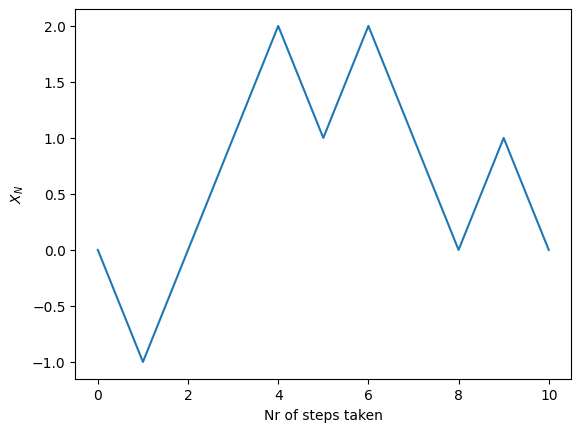

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(12345)

nr_steps = 10
X = np.zeros(nr_steps + 1)

X[0] = 0
for N in range(nr_steps):
    X[N + 1] = X[N] + 2 * np.random.randint(2) - 1

plt.plot(range(nr_steps + 1), X)
plt.xlabel("Nr of steps taken")
plt.ylabel(r"$X_N$")
plt.show()

Simply using `plt.plot`, in this case, can be misleading, so it is useful to change the plot style or use the `plt.step` function instead

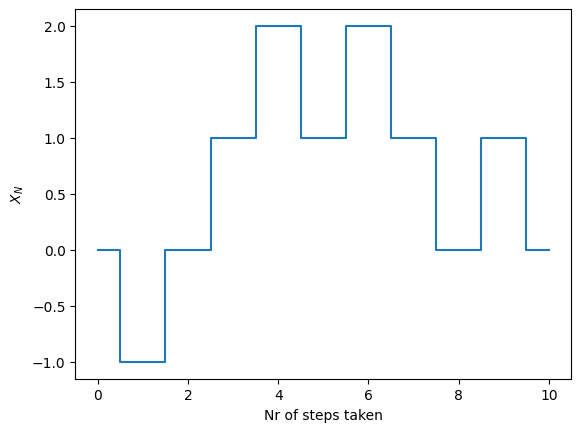

In [2]:
plt.step(range(nr_steps + 1), X, where="mid")
plt.xlabel("Nr of steps taken")
plt.ylabel(r"$X_N$")
plt.show()

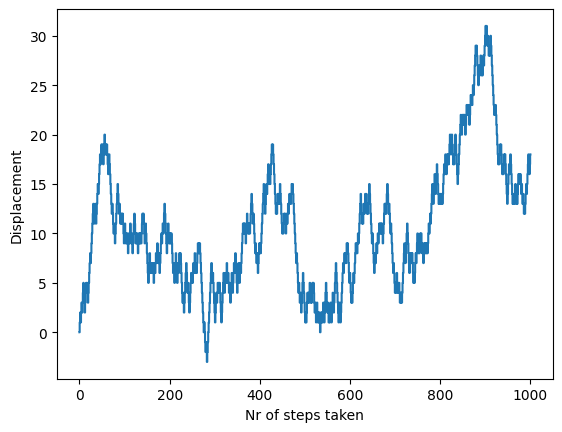

In [3]:
nr_steps = 1000
X = np.zeros(nr_steps + 1)

X[0] = 0
for N in range(nr_steps):
    X[N + 1] = X[N] + 2 * np.random.randint(2) - 1

plt.step(range(nr_steps + 1), X, where="mid")
plt.xlabel("Nr of steps taken")
plt.ylabel("Displacement")
plt.show()

### Vectorized Random Walk

As discussed in [Using Random Numbers](using_random_numbers.md), to repeatedly draw random numbers, `np.random` can be used in a vectorized way to be more efficient. This can be done for a random walk as follows.

Drawing the steps is straightforward.

In [4]:
nr_steps = 1000
steps = 2 * np.random.randint(2, size=nr_steps) - 1

However, we need to combine these steps into the variable $X_N$. If only the final displacement after all the steps is desired, this can be obtained by simply doing the sum
$X_{1000} = \sum_{i=1}^{1000} K_i$.
Conversely, if the plot for the whole trajectory of the walk is desired, all the partial sums need to be computed as well, i.e., $X_N$ for $N=1, 2, 3, \ldots 1000.$

This can be obtained via the function `np.cumsum`, which stands for *cumulative sum*. Taking the cumulative sum of a sequence gives a new sequence where element $n$ of the new sequence is the sum of the first $n$ elements of the input. Thus, the cumulative sum of $K_N$ will give $X_N$.

In [5]:
X = np.zeros(nr_steps + 1)
X[0] = 0
X[1:] = X[0] + np.cumsum(steps)

Note that we could have directly defined `X = np.cumsum(steps)`. However, in that case, $X_0$ would not be 0, but -1 or 1. That is not a major issue, but it requires the extra step of defining $X_0 = 0$ and then finding the rest of $X_N$ for $N > 100$.

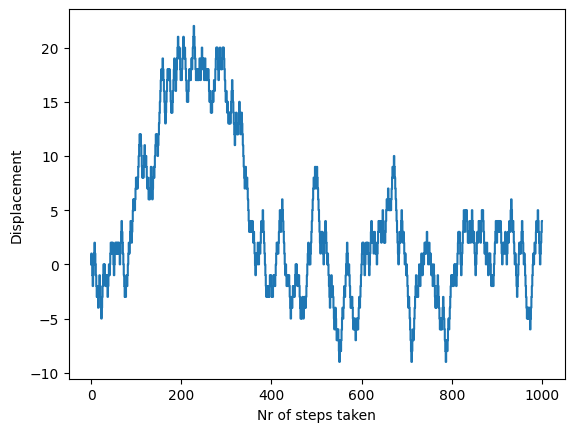

In [6]:
plt.step(range(nr_steps + 1), X, where="mid")
plt.xlabel("Nr of steps taken")
plt.ylabel("Displacement")
plt.show()

### Many Walkers

Because the walker is completely random, understanding how it behaves from looking at a single walker is not that useful. Instead, it is possible to look at a large *ensemble* of walkers and get insights into how they behave.

We can also use the vectorization of `np.random` to draw the walks of many different walkers in a vectorized manner

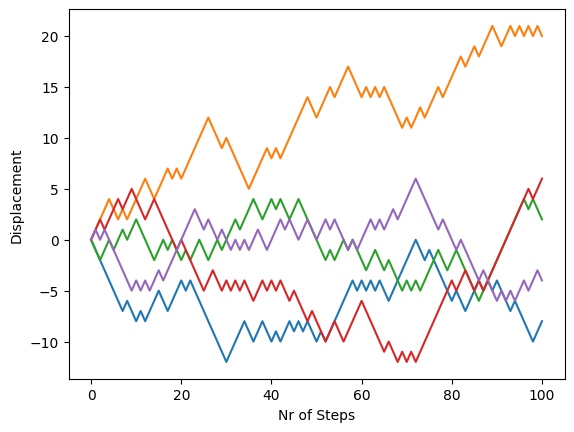

In [7]:
nr_steps = 100
walkers = 5

X = np.zeros((nr_steps + 1, walkers))
X[0, :] = 0

steps = 2 * np.random.randint(2, size=(nr_steps, walkers)) - 1
X[1:, :] = np.cumsum(steps, axis=0)

plt.plot(X)
plt.xlabel("Nr of Steps")
plt.ylabel("Displacement")
plt.show()

Or with many more steps

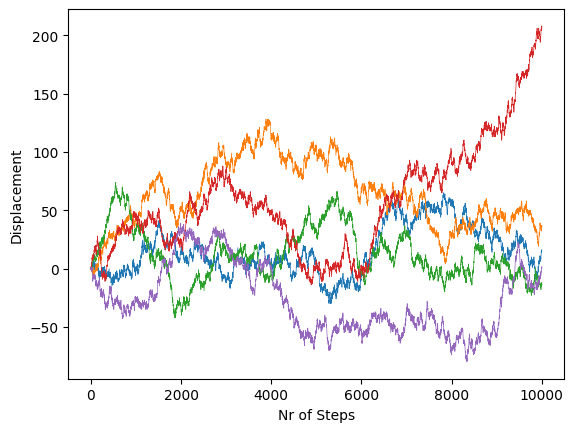

In [8]:
nr_steps = 10000
walkers = 5

X = np.zeros((nr_steps + 1, walkers))
X[0, :] = 0

steps = 2 * np.random.randint(2, size=(nr_steps, walkers)) - 1
X[1:, :] = np.cumsum(steps, axis=0)

plt.plot(X, linewidth=0.5)
plt.xlabel("Nr of Steps")
plt.ylabel("Displacement")
plt.show()

### Very Many Walkers

The discussion above was limited to a plot with only five walkers. However, to understand the average behavior, it is necessary to plot several more walkers. Although this is possible with the code displayed so far, the output will not convey much information, as it will become too chaotic.

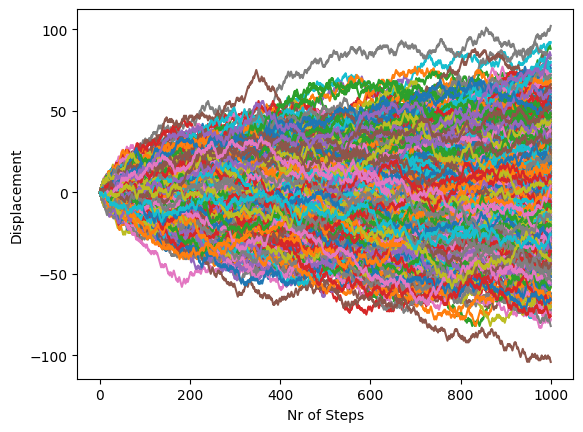

In [9]:
nr_steps = 1000
walkers = 1000

X = np.zeros((nr_steps + 1, walkers))
X[0, :] = 0

steps = 2 * np.random.randint(2, size=(nr_steps, walkers)) - 1
X[1:, :] = np.cumsum(steps, axis=0)

plt.plot(X)
plt.xlabel("Nr of Steps")
plt.ylabel("Displacement")
plt.show()

The above plot shows one thousand random, but the isolated behavior is impossible to analyze because the different lines overlap.

To fix this, instead of plotting all the walks over each other, the *density* of walkers is plotted. This is accomplished by using the `alpha` keyword on `plt.plot`. This keyword is used to make a line semi-transparent. Here, `alpha=1` is the default, non-transparent line, while `alpha=0` is a completely transparent, and thus invisible, line. Setting, for example, `alpha=0.1`, 10% transparent lines are displayed.

With semi-transparent lines, anywhere many lines overlap will have a strong color. Conversely, if there are fewer lines, the result is a weaker color. To emphasize this, let us also only plot black lines, and ignore colors.
In the beginning, all the walkers are close to the origin, as they simply have not had time to get further away. Then, as time progresses toward the right, the walkers spread out. The highest density of walkers is still found in the middle, however, as the net sum of steps will tend towards a mean of 0.


### Analyzing the average behavior of a walker

Because the random walk is a random process, predicting how a single walker will move is impossible. However, if we instead look at multiple walkers, their *average* activity can be analyzed. Because of the law of large numbers, the average behavior for a large number of walkers will converge to a specific behavior.

Compare, for example, the first plot of a single walker. Rerunning this code gives dramatically different behavior as one specific walk looks very different from another different one. For the last figure, however, rerunning the code will not change significantly because the average behavior of 1000 walkers will tend to be the same.

One way to explore the average behavior is, of course, to do a simulation and then take the sample average. For more complex random walk behaviors, this is the only option. The shown random walk, however, is quite simple, so mathematically analyzing it is also possible.

#### Average Displacement

For a single walker, the position of the walker after $N$ steps was given by

$$X_N = X_0 + \sum_{i=1}^N K_i$$

or alternatively:

$$X_{N+1} = X_{N} + K_N.$$

The objective is then to compute the *average* of this variable for a more significant number of walkers. This average will be denoted $\langle X_N \rangle$, which is also used to express the *expected value* or *expectation*. If the reader does not have familiarity with these terms, it suffices to think of the value as the average of a large number of walkers.

Taking the average of the $X_N$ gives

$$\langle X_{N+1} \rangle = \langle X_N + K_N \rangle.$$

However, taking an average is a linear operation, so we can split the right-hand side into

$$\langle X_{N+1} \rangle = \langle X_N \rangle + \langle K_N \rangle.$$

Notice that $\langle X_{N} \rangle$ is not known yet. However, $\langle K_N \rangle$ is known, as it is simply the average of the two outcomes

$$\langle K_N \rangle = \frac{1}{2}\cdot1 +  \frac{1}{2}\cdot (-1) = \frac{1}{2} - \frac{1}{2} = 0.$$

As there is an equal chance of taking a step to the left and the right, the *average* displacement for a single step will be 0. Inserting this gives

$$\langle X_{N+1} \rangle = \langle X_{N} \rangle.$$

If the walkers start at $X_0 = 0$, then $\langle X_0 \rangle =0$, which in turn implies $\langle X_1 \rangle = 0$, $\langle X_2 \rangle = 0$, and so on. Consequently

$$\langle X_{N}\rangle = 0.$$

This expression shows that the average displacement of a large number of walkers will be 0, no matter how many steps they take. This observation can seem unexpected since, as discussed, the more steps the walkers take, the further away from the origin they will tend to move.

Nevertheless, the average is 0 because this is a completely *uniform* and symmetric walker. The walkers have an equal chance of moving left or right from the origin so the average will tend to be 0, even if the walkers move away from the origin.


#### Averaged Square Displacement

The average displacement became 0 as the problem is completely symmetric. However, investigating the squared displacement $X_N^2$ gives a better intuition about how far away from the origin the walkers move. This is because the square is positive regardless of whether the walker moves away in the positive or negative direction.

The expression for $X_{N+1}^2$ can be written as

$$X_{N+1}^2 = (X_{N} + K_N)^2 = X_{N}^2 + 2X_N \cdot K_N + K_N^2.$$

Again, since the average is the quantity of interest,

$$\langle X_{N+1}^2 \rangle = \langle X_{N}^2 \rangle + 2\langle X_N \cdot K_N \rangle + \langle K_N^2 \rangle.$$

The term $\langle X_N \cdot K_N \rangle$ will again be zero because $K_N$ is independent of $X_N$ and has an equal chance of being positive and negative. Hence, it follows

$$\langle X_{N+1}^2 \rangle = \langle X_N^2 \rangle + \langle K_N^2 \rangle.$$

It is also possible to compute $\langle K_N^2 \rangle$

$$\langle K_N^2 \rangle = \frac{1}{2}(1)^2 + \frac{1}{2}(-1)^2 = \frac{1}{2} + \frac{1}{2} = 1.$$

Thus we get

$$\langle X_{N+1}^2 \rangle = \langle X_N^2 \rangle + 1.$$

Given $X_0 = 0$, it follows that $\langle X_1 \rangle = 1$, $\langle X_2 \rangle = 2$, and so on.

$$\langle X_N^2 \rangle = N.$$

While it is clear that the average displacement does not change over time ($\langle X_N \rangle = 0$), the average squared displacement does! In fact, the squared displacement grows linearly with the number of steps $N$. The longer a random walk is carried on, the further away from the origin the walker will tend to move.

This expression also contains information about the *variance* of the walkers since the variance of a random variable can always be written as

$$\text{Var}(X_N) = \langle X_N^2 \rangle - \langle X_N \rangle^2.$$

Therefore, in this case

$$\text{Var}(X_N) = N - 0^2 = N,$$

and finally the variance of $X_N$ is also $N$.


#### Root Mean Square Displacement

While it is clear from the expression

$$\langle X_N^2 \rangle = N,$$

that the walkers will tend to move further away from the origin, notice that this quantity is the *squared* displacement. A more intuitive quantity would be the average absolute *displacement*, $\langle |X_N| \rangle$. Although a useful quantity, the average absolute displacement can be slightly challenging to compute.

As an easier solution, it is possible to take the root of the mean squared displacement,

$$\text{RMS} = \sqrt{\langle X_N^2 \rangle} = \sqrt{N}.$$

This quantity is known as the *root mean square* displacement (RMS). It will not be exactly the same as $\langle |X_N| \rangle$, but it will be close to it.

Because the root mean square displacement grows as $\sqrt{N}$, a 1D random walker will tend to be, on average, $\sqrt{N}$ away from the origin after taking $N$ steps.



### Plotting the RMS

The previous statement can be verified by repeating the density plot with 1000 walkers together with the expression for the RMS: $\sqrt{N}$.

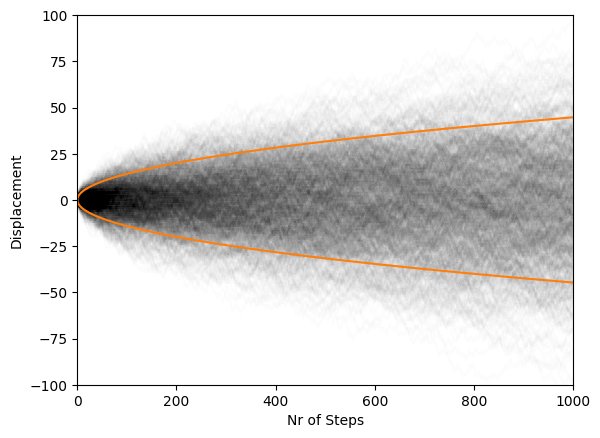

In [10]:
N = 1000
walkers = 1000

k = 2 * np.random.randint(2, size=(N, walkers)) - 1
X = np.cumsum(k, axis=0)

plt.plot(X, alpha=0.01, color="k")
plt.plot(range(N), np.sqrt(2 * np.arange(N)), color="C1")
plt.plot(range(N), -np.sqrt(2 * np.arange(N)), color="C1")
plt.xlabel("Nr of Steps")
plt.ylabel("Displacement")
plt.axis((0, 1000, -100, 100))
plt.show()

We see that the density of walkers inside the RMS curves is higher than outside it. This is expected, as the root-mean-square will tend to give outliers more weight. The RMS curves still seem reasonable, as they indicate the approximate region where most walkers will be found. In addition, the scaling also appears to follow intuition.

Instead of plotting it, it is also possible to compute the root-mean-square value of the 1000 walkers and compare this *sample mean* to the analytical expression.

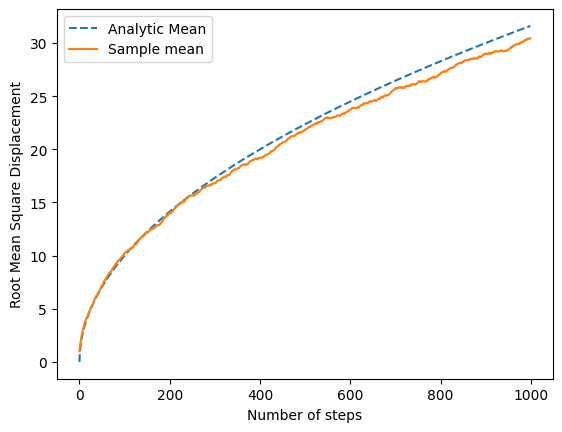

In [11]:
N = 1000
walkers = 1000

k = 2 * np.random.randint(2, size=(N, walkers)) - 1
X = np.cumsum(k, axis=0)

RMS = np.sqrt(np.mean(X**2, axis=1))

plt.plot(np.arange(N), np.sqrt(np.arange(N)), "--", label="Analytic Mean")
plt.plot(np.arange(N), RMS, label="Sample mean")
plt.legend()
plt.xlabel("Number of steps")
plt.ylabel("Root Mean Square Displacement")
plt.show()

It is evident the analytic expression follows the expected behavior.


### Flipping Coins and the Law of Large Numbers
So far, random walks have been discussed as mainly a theoretical exercise. But, as an example, is it possible to couple the developed theory into more concrete situations.

The 1D random walk is the sum of a discrete random variable that has two equally likely outcomes, similar to subsequent coin flip experiments. Thus, the random walk can be used to model the process of flipping a coin many times and keeping track of the total number of heads and tails obtained.

This example has been discussed in [Using Random Numbers](using_random_numbers.md), and the code can be displayed below.

In [12]:
def flip_coins(N):
    flips = np.random.randint(2, size=N)
    heads = np.sum(flips == 0)
    tails = N - heads
    return heads, tails


print("Flipping 1000 coins:")
heads, tails = flip_coins(1000)
print("Heads:", heads)
print("Tail:", tails)

Flipping 1000 coins:
Heads: 504
Tail: 496


When $N$ coins are flipped, the expected result is to have approximately an equal number of heads and tails (about $N/2$ of each). Nevertheless, the number of heads and tails should not be *exactly* $N/2$. The probability of getting a perfectly even distribution *decreases* with the number of throws $N$. The probabilities for some experiments are shown below.

In [13]:
print(f"{'N':>10} {'Heads':>10}|{'Tails':<6} {'Deviation':>12}  {'Ratio':>10}")
print("=" * 60)

for N in 10, 1000, 10**4, 10**5, 10**6:
    for i in range(3):
        heads, tails = flip_coins(N)
        print(
            f"{N:>10} {heads:>10}|{tails:<6} {abs(N/2-heads):10}  {heads/N:>10.1%}|{tails/N:<6.1%}"
        )
    print()
print("=" * 60)

         N      Heads|Tails     Deviation       Ratio
        10          5|5             0.0       50.0%|50.0% 
        10          6|4             1.0       60.0%|40.0% 
        10          4|6             1.0       40.0%|60.0% 

      1000        515|485          15.0       51.5%|48.5% 
      1000        485|515          15.0       48.5%|51.5% 
      1000        488|512          12.0       48.8%|51.2% 

     10000       5018|4982         18.0       50.2%|49.8% 
     10000       4903|5097         97.0       49.0%|51.0% 
     10000       4974|5026         26.0       49.7%|50.3% 

    100000      49789|50211       211.0       49.8%|50.2% 
    100000      49994|50006         6.0       50.0%|50.0% 
    100000      50015|49985        15.0       50.0%|50.0% 

   1000000     500290|499710      290.0       50.0%|50.0% 
   1000000     499252|500748      748.0       49.9%|50.1% 
   1000000     499766|500234      234.0       50.0%|50.0% 



Here, we explore how the number of flips we are away from a perfectly even split grows with $N$. This quantity will be called *deviation* and is equivalent to the displacement of one of the random walkers. As mentioned, the root mean square displacement grows as $\sqrt{N}$. The bigger the number of coin flips $N$, the larger the expected deviation from the baseline.

Notice, however, that this does not contradict the law of large numbers - it actually highlights an important point about the theorem. The law of large numbers only guarantees that the *average* over many trials will approach the expected value for large numbers. Thus the law of large numbers states that the *ratio* of heads and tails will tend to 50%/50% as the number of flips tends to infinity. However, it gives no guarantee that the number of outcomes will be the same.

In fact, this behavior is present in the obtained results above. While the deviation grows with $N$, for the exact same random sample, the *ratio* of heads and tails approaches 50/50! This is because the ratio is computed from

$$P(\text{heads}) \approx \frac{\text{number of heads}}{N}.$$

As the deviation in the number of heads grows as $\sqrt{N}$, the deviation in the *ratio* grows as

$$\frac{\sqrt{N}}{N} = \frac{1}{\sqrt{N}}.$$

Consequently, the obtained results follow the law of large numbers instead of contradicting it.

It is important to notice that the law of large numbers only gives information about averages, never single events. It is a very common fallacy to think that the number of heads and tails has to *even out* in the long run. This is known as the *Gambler's Fallacy*.


### 2D Random Walk

So far, the discussion about random walks has been limited to the one-dimensional case. It is, however, equally possible to study a random walker moving in a 2D plane, and his movement will still be analyzed on a regular grid or lattice.

For every step, there are then four choices for the walker. The grids in the plane can be envisioned as the streets of a city seen from above, and the possible directions would be *north*, *south*, *west*, and *east*. The walker's displacement is then denoted as

$$\vec{R}_N = (X_N, Y_N).$$

The simulation of this scenery is displayed below

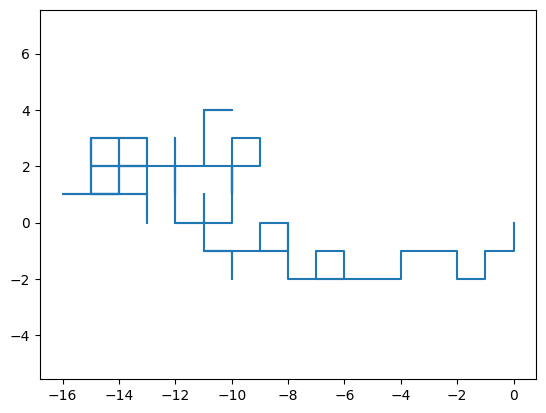

In [14]:
possible_steps = [(1, 0), (-1, 0), (0, 1), (0, -1)]

N = 100
R = np.zeros((N + 1, 2))
R[0] = (0, 0)

for i in range(N):
    step = possible_steps[np.random.randint(4)]
    R[i + 1] = R[i] + step

X = R[:, 0]
Y = R[:, 1]
plt.plot(X, Y)

plt.axis("equal")
plt.show()

Here we specify the possible steps and draw one of these at random for every step. However, performing this procedure in a vectorized way is slightly difficult, and in order to simplify it, the walker will be allowed to take a step in both dimensions for each step. Consequently, instead of having the initial possible coordinates

$$(1, 0) \quad (-1, 0) \quad (0, 1) \quad (0, -1),$$

the walker will have as possibilities,

$$(1, 1) \quad (1, -1) \quad (-1, 1) \quad (-1, 1).$$


This makes computing the problem considerably easier, given that the steps in the $X$ and $Y$ direction are now decoupled.

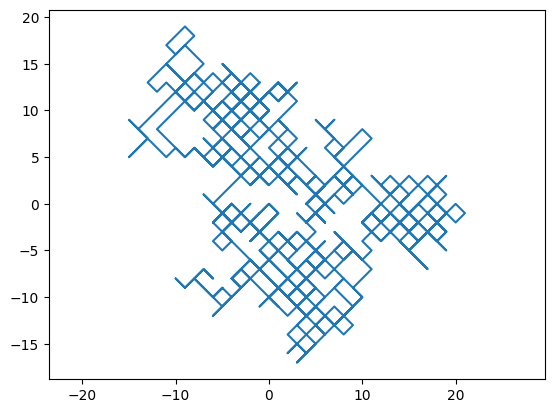

In [15]:
N = 1000
steps = 2 * np.random.randint(2, size=(N, 2)) - 1
R = np.cumsum(steps, axis=0)

X = R[:, 0]
Y = R[:, 1]

plt.plot(X, Y)
plt.axis("equal")
plt.show()

Due to this change in allowed dislocation, the walker now walks a distance of $\sqrt{2}$ every step instead of 1. Another difference is that the resulting plot looks like the diagonal version of the previous one.


Increasing the number of steps results in the following plot

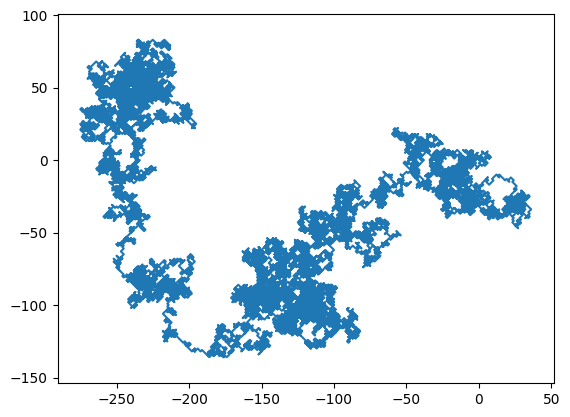

In [16]:
N = 25000
steps = 2 * np.random.randint(2, size=(N, 2)) - 1
R = np.cumsum(steps, axis=0)

X = R[:, 0]
Y = R[:, 1]

plt.plot(X, Y)
plt.axis("equal")
plt.show()

Since the walker is now using two spatial dimensions, it is not possible to make a two-dimensional plot of the walk over time. Despite being able to plot out the total trajectory over time, this has some drawbacks. More specifically, it is hard to understand how the walk builds up over time and how much the walk doubles back over itself.


A fix, which will not be implemented, is to create an animation of the walk over time. The links below contain animations that illustrate the time evolution of the walks.
1. [Animated random walk in 2D with 2500 steps](https://upload.wikimedia.org/wikipedia/commons/f/f3/Random_walk_2500_animated.svg)
2. [Animated random walk in 2D with 25000 steps](https://upload.wikimedia.org/wikipedia/commons/c/cb/Random_walk_25000.svg)



### Plotting several walkers

As done in the one-dimensional case, it is possible to plot several walks over each other

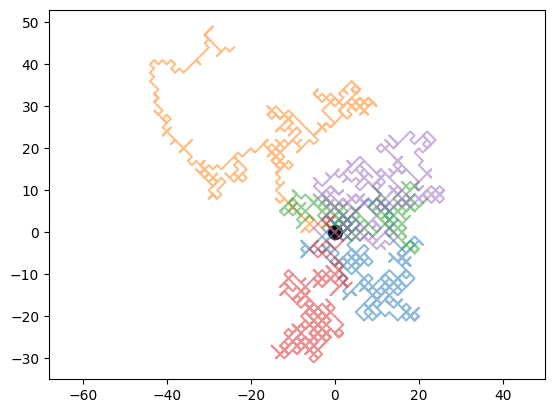

In [17]:
nr_steps = 500
nr_walkers = 5

for walker in range(nr_walkers):
    steps = 2 * np.random.randint(2, size=(nr_steps, 2)) - 1
    R = np.cumsum(steps, axis=0)

    X = R[:, 0]
    Y = R[:, 1]

    plt.plot(X, Y, alpha=0.5)
    plt.axis("equal")

plt.scatter(0, 0, marker="o", color="black", s=100)
plt.show()

Here, we plot five random walks simultaneously and mark the origin with a black circle.


### Analyzing the Mean Displacement

The analysis of the walker's average displacement can also be conducted for the two-dimensional case. This time, however, all the theoretical discussion follows naturally from the one-dimensional case. We know that

$$\vec{R}_N   = (X_N, Y_N).$$

So, to find the mean displacement,

$$\langle \vec{R}_N \rangle = (\langle X_N \rangle, \langle Y_N \rangle).$$

However, both $X_N$ and $Y_N$ behave exactly like a 1D-walker, as they increase by -1 or 1 every step. Consequently,

$$\langle \vec{R}_N \rangle = (0, 0).$$

This result is expected because the 2D problem is completely symmetric, just like the 1D case. The average will therefore tend to be the exact origin.

The mean square displacement for the bi-dimensional problem involves taking the square of the vector, which is the dot product of the displacement vector with itself, and the square of the walker's distance to the origin.

$$\langle |\vec{R_N}|^2 \rangle = \langle X_N^2 \rangle + \langle Y_N^2 \rangle.$$

So the problem again returns to the one-dimensional case, and it is possible to use the previously calculated quantities for the 1D walker.

$$\langle |\vec{R_N}|^2 \rangle = 2N.$$

Thus, the root mean square distance of a 2D random walker to the origin is given by

$$\text{RMS} = \sqrt{\langle |\vec{R_N}|^2 \rangle} = \sqrt{2N}.$$

This can be drawn into the 2D plot to evaluate if it seems reasonable.

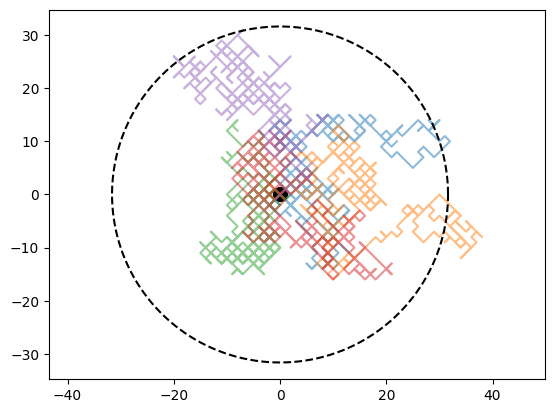

In [18]:
nr_steps = 500
nr_walkers = 5

# Plot random walks
for walker in range(nr_walkers):
    steps = 2 * np.random.randint(2, size=(nr_steps, 2)) - 1
    R = np.cumsum(steps, axis=0)
    X = R[:, 0]
    Y = R[:, 1]
    plt.plot(X, Y, alpha=0.5)
    plt.axis("equal")

# Plot origin
plt.scatter(0, 0, marker="o", color="black", s=100)

# Plot analytic RMS
rms = np.sqrt(2 * nr_steps)
theta = np.linspace(0, 2 * np.pi, 1001)
plt.plot(rms * np.cos(theta), rms * np.sin(theta), "k--")

# Plot
plt.show()

## Why Random Walkers are so interesting

The random walker is an example of a process that is built up of simple random steps but whose net behavior can be complex.
These kinds of processes are found throughout the natural sciences and in mathematics. The list of applications of random walks is, therefore, very long and varied.

Some examples of processes that can be modeled with random walks are:
* The price of stocks in economics
* Modeling of population dynamics in biology
* The modeling of genetic drift
* The study of polymers in material science uses a special type of self-avoiding random walks
* In image processing, images can be segmented by using an algorithm that randomly walks over the image
* Twitter uses a random walk approach to make suggestions of who to follow

And these are just *some* examples.


## Continuous Model

As a final example, we discuss how to move from a discrete random walk model to a continuous one.
It can be noted in some previously discussed plots that when moving towards a larger number of steps $N$, the movement of the random walker does not look so forced anymore.
Instead, the walks begin to *seem* more like a continuous process. This is, indeed, the whole reasoning behind moving to a continuous model: letting $N\to\infty$.
Obviously, that is impossible on a computer. Nevertheless, we can analyze the problem mathematically.


To keep the problem simple, consider the uniform 1D random walker. Instead of dealing with the displacement $X_N$, we now define a function $P(x, t)$ that denotes the probability of finding the walker at position $x$ at time $t$.

Because we have a discrete model, the walker moves a length $\Delta x$ each step and will be at a position

$$x_i = i\cdot \Delta x.$$

In addition, assuming the walker takes one step every $\Delta t$ time step, we denote a given time as

$$t_j = j\cdot \Delta t.$$

Thus, we are dealing with the probability of finding the walker at position $x_i$ at time $t_j$, which is described by the function $P(x_i, t_j)$, or simply $P_{i, j}$ in a more compact notation.

The objective is not necessarily to find an expression for $P$ but to derive an expression for how it develops over time. Put more formally: the objective is to find an expression for the time-derivative

$$\frac{\partial P(x, t)}{\partial t},$$

i.e., to obtain a differential equation. Finding a time derivative involves dealing with an expression on the form:

$$\frac{P(x_i, t_{j+1}) - P(x_i, t_j)}{\Delta t}.$$

Because then it is possible to take the limit $\Delta t \to 0$ to get a derivative.


As we are trying to find the time-derivative of $P(x, t)$, let us write out what is known about stepping forward in time for the model.
The probability of finding the walker in position $x_i$ at the *next* time step, must be given by the chance of finding it at the two neighboring grid points at the current time step, so

$$P(x_i, t_{j+1}) = \frac{1}{2}P(x_{i-1}, t_j) + \frac{1}{2}P(x_{i+1}, t_j).$$

The reason the two terms have a factor of 1/2 is that there is only a 50% chance of a walker in those grid points moving in the right direction.


To find an expression for the time derivative, we need to subtract $P(x_i, t_j)$ from both sides of the previous equation.

$$P(x_i, t_{j+1}) - P(x_i, t_j) = \frac{1}{2}\big(P(x_{i-1}, t_j) - 2P(x_i, t_j) + P(x_{i+1}, t_j)\big).$$

The next step is then to divide both sides by $\Delta t$

$$\frac{P(x_i, t_{j+1}) - P(x_i, t_j)}{\Delta t}=\frac{1}{2\Delta t}\big(P(x_{i-1}, t_j) - 2P(x_i, t_j) + P(x_{i+1}, t_j)\big).$$

The above expression is similar to what is needed to take the limit $\Delta t \to 0$. However, if this is done directly, the right-hand side of the equation will tend to infinity.
To avoid this, it is possible to expand the fraction by a factor of $\Delta x^2$

$$\frac{P(x_i, t_{j+1}) - P(x_i, t_j)}{\Delta t}=\frac{\Delta x^2}{2\Delta t}\frac{P(x_{i-1}, t_j) - 2P(x_i, t_j) + P(x_{i+1}, t_j)}{\Delta x^2}.$$


This is mathematically useful because we can now take the limit of $\Delta t \to 0$ and $\Delta x^2 \to 0$ at the *same* time. This way, it is possible to enforce the constraint that

$$\frac{\Delta x^2}{2\Delta t} = \text{constant}.$$

Because this expression will be a constant, it is rewritten as $D$. It then follows

$$\lim_{\substack{\Delta t \to 0 \\ \Delta x \to 0 \\ D={\rm const.}}}  \bigg[\frac{P(x_i, t_{j+1}) - P(x_i, t_j)}{\Delta t}= D \frac{P(x_{i-1}, t_j) - 2P(x_i, t_j) + P(x_{i+1}, t_j)}{\Delta x^2}\bigg].$$


Both sides of the above equation are derivatives. While the term on the left is equal to the time derivative of $P$, the expression on the right is the second-order derivative with respect to $x$! Consequently,

$$\frac{\partial P}{\partial t} = D\frac{\partial^2 P}{\partial x^2}.$$


The above reasoning can be summarized as follows. The random walker was assumed to take steps of $\Delta x$ in time $\Delta t$ so that the limit for both of these quantities tending to zero was taken.
Effectively, we are saying the walker takes infinitesimally small steps, infinitely fast. This is virtually the same as letting the number of steps taken go to infinity ($N \to \infty$), but in a manner in which the total displacement of the walker stays bounded.


Taking the limit of a simple 1D walker has given a partial differential equation known as the *Diffusion Equation*, or alternatively the *Heat Equation*.
This is one of the most fundamental and important equations in the natural sciences, so it is astonishing that it can be derived from a simple random walker!

For more information and more detailed derivations, see, for example:
- [Mark Kac's classical paper from 1947](http://www.math.hawaii.edu/~xander/Fa06/Kac--Brownian_Motion.pdf) {cite}`kac1947random`

In practice, one does not use a 1D diffusion equation, but a 3D one:

$$\frac{\partial u}{\partial t} = \nabla^2 u.$$

But this partial differential equation can be found by taking the limit of a 3D random walker in exactly the same manner.


### Solving the Diffusion Equation

The interesting aspect of the above derivation is that we have gone from a discrete, numerically solvable problem into a continuous partial differential equation.
This is the opposite process of what we are used to dealing with when solving numerical problems!

In order to solve the diffusion equation numerically, we have to discretize the equation again and move back to the effective 1D walker.
This discussion is further elaborated in the supplemental material [*Solving the 1D Diffusion Equation*](solving_the_1D_diffusion_equation.md).



## References

```{bibliography}
:filter: docname in docnames
```